<div align="center"> <h3><font color='blue'>CSE 574: Introduction to Machine Learning, Summer 2022 </font> 
<h1> Assignment 3 

Building Neural Networks and CNN 

<h2><font color='red'>Checkpoint: </font>  July 1, Fri, 11:59pm </div>

<h3><font color='blue'>Description: </div>

Welcome to our third assignment. This assignment focuses on building fully connected
neural networks (NN) and convolutional neural networks (CNN). It consists of two parts
where you practice dealing with large datasets and implement, train, adjust neural
networks.
The first part consists of performing data analysis (which you know is the first step for
every ML project) and building a basic NN. In the second part, we will implement a basic
CNN.
Apart from this do not miss out some extra bonus points, by completing the task
described at the end of this description.
Note for using Libraries: For this assignment any pre-trained or pre-build neural
networks or CNN architectures cannot be used (e.g. torchvision.models,
keras.applications). This time you are welcome to use scikit-learn for data
preprocessing. You are expected to use TensorFlow, Keras or PyTorch libraries to build
a NN (e.g. works using sklearn.neural_network.MLPClassifier won't be evaluated) 



###Part I: : Building a Basic NN [50 points]
In this part we will work on Income dataset. You must achieve a minimum accuracy of
82%. Take guidance from the steps mentioned below.


###STEPS
1.Load, preprocess, analyze the dataset and make it ready for training. You can
refer to Assignment 2: Part 1 - Data Analysis steps. Applying the right
preprocessing techniques can help you increase the accuracy. Refer here for
more details on preprocessing methods.

2.Build and train a basic NN (with max 3 hidden layers).
You can use TensorFlow, PyTorch or Keras as a deep learning framework.
Decide your NN architecture:
- How many input neurons are there?
- What activation function will you choose?
- What is the number of hidden layers? (1, 2 or 3?)
- What is the size of each hidden layer?
- What activation function is used for the hidden and output layer?
3.Test your NN on the test dataset.



###In your report for Part I
1.Provide brief details about the nature of your dataset. What is it about? What
type of data are we encountering? How many entries and variables does the
dataset comprise? Provide the main statistics about the entries of the dataset.

2.Provide at least 3 visualization graphs with short description for each graph.

3.For the preprocessing part, discuss if you use any preprocessing tools, that helps
to increase the accuracy of your model.

4.Provide the architecture structure of your NN.

5.Provide graphs that compares test and training accuracy on the same plot and
test and training loss on the same plot. Thus, in total two graphs with a clear
labeling.



### Academic Integrity

This assignment must be completed individually.
The standing policy of the Department is that all students involved in any academic integrity violation (e.g. plagiarism in any way, shape, or form) will receive an F grade for the course. The catalog describes plagiarism as “Copying or receiving material from any source and submitting that material as one’s own, without acknowledging and citing the particular debts to the source, or in any other manner representing the work of another as one’s own.”. Refer to the [Office of Academic Integrity](https://www.buffalo.edu/academic-integrity.html) for more details.

    
### Late Days Policy
You can use up to 3 late days throughout the course toward any assignments. You do not have to inform the instructor, as the late submission will be tracked in UBlearns.

### FAQ
>What does 'raise Exception("Not implemented yet")' mean?

Here we define a custom exception to highlight that the task is not implemented yet. Once you implement your code, ensure to remove this part.

>Can I add code beyond # BEGIN_YOUR_CODE parts.

Yes, you can add helper functions. Add them in the separate cell with the comments, why you need it.


**PART II: Logistic Regression-:**

###IMPORTING LIABRARIES

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from functools import partial

###LOADING DATASET

In [ ]:
!pwd
!ls

/content
income_dataset.csv  model.png  sample_data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd ..
# %cd /content/drive/MyDrive
# from google.colab import files
# uploaded = files.upload()
# print("dataset loaded")

###Income Dataset (income_dataset.csv)

In [ ]:
#Reading the dataset
df_income=pd.read_csv('income_dataset.csv')


In [ ]:
#Printing the first 10 rows of the income dataset using .head
print("First 10 rows of the income datset:")
df_income.head(10) #prints first 10 rows of the datset

First 10 rows of the income datset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [ ]:
#Printing the names of the columns of the dataset
columns=df_income.columns #saves the column names of the dataset in variable  columns
print("Printing coloumn names  of the dataset: \n")
print(columns ) #prints the names of columns

Printing coloumn names  of the dataset: 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


In [ ]:
#Printing the shape of the dataset
shape = df_income.shape #saves the shape of the dataset in variable shape
print("Shape of the dataset:")
print(shape) #prints the shape

Shape of the dataset:
(32561, 15)


In [ ]:
#Printing the statistics of the income dataset
print("Printing statstics of the income dataset:")
df_income.describe(include='all') #describes the mean, std, etc.. for the dataset

Printing statstics of the income dataset:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
#Value count of each type of education
df_income['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
#Printing the datatypes of various columns
types=df_income.dtypes #saves the datatypes of the dataset in variable types
print("Printing datatypes of each coloums in the dataset:")
print(types)  #prints the different datatypes n of columns

Printing datatypes of each coloums in the dataset:
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


###CHECKING NULL VALUES

In [ ]:
#checking for null values in the dataset
null=df_income.isnull().sum(axis=0)
print(null)#prints the number of null values in the dataset


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [ ]:
#printing the general information of the income dataset
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#converting object type to caterory
df_income['workclass'] = df_income['workclass'].astype('category') # converts the object datatype to catergory
df_income['education'] = df_income['education'].astype('category') # converts the object datatype to catergory
df_income['marital.status'] = df_income['marital.status'].astype('category') # converts the object datatype to catergory
df_income['occupation'] = df_income['occupation'].astype('category') # converts the object datatype to catergory
df_income['relationship'] = df_income['relationship'].astype('category') # converts the object datatype to catergory
df_income['race'] = df_income['race'].astype('category') # converts the object datatype to catergory
df_income['sex'] = df_income['sex'].astype('category') # converts the object datatype to catergory
df_income['native.country'] = df_income['native.country'].astype('category') # converts the object datatype to catergory
df_income['income'] = df_income['income'].astype('category') # converts the object datatype to catergory

In [ ]:
#printing the general information of the income dataset after conversion
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [ ]:
# Replacing '?' values in the columns with NaN
df_income.replace("?", np.nan, inplace = True) #replacing the ? with nan values
df_income.isnull().any(axis=1).sum()


2399

In [ ]:
#Handling missing values and drpping them
df_income.dropna(inplace=True) #dropping the missing values


In [ ]:
df_income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


###DATA VISUALIZATION

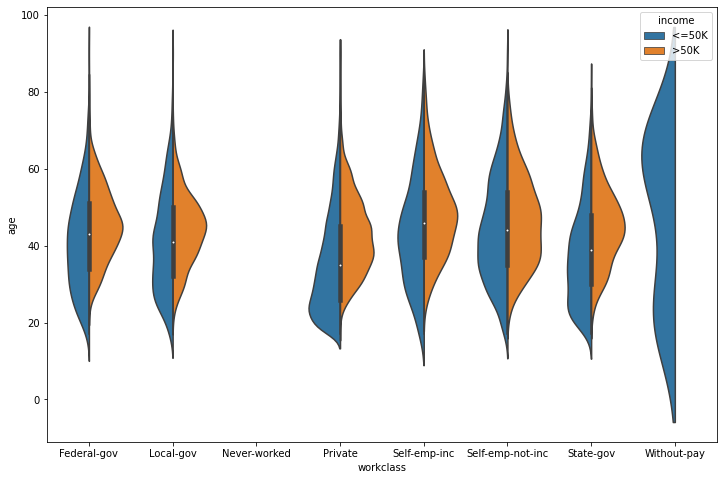

In [ ]:
#Plotting a violin plot for workclass and age with hue income
fig=plt.figure(figsize=(12,8)) #size of the figure
sn.violinplot(x='workclass', y='age', data=df_income,hue='income',split=True) 
plt.show()

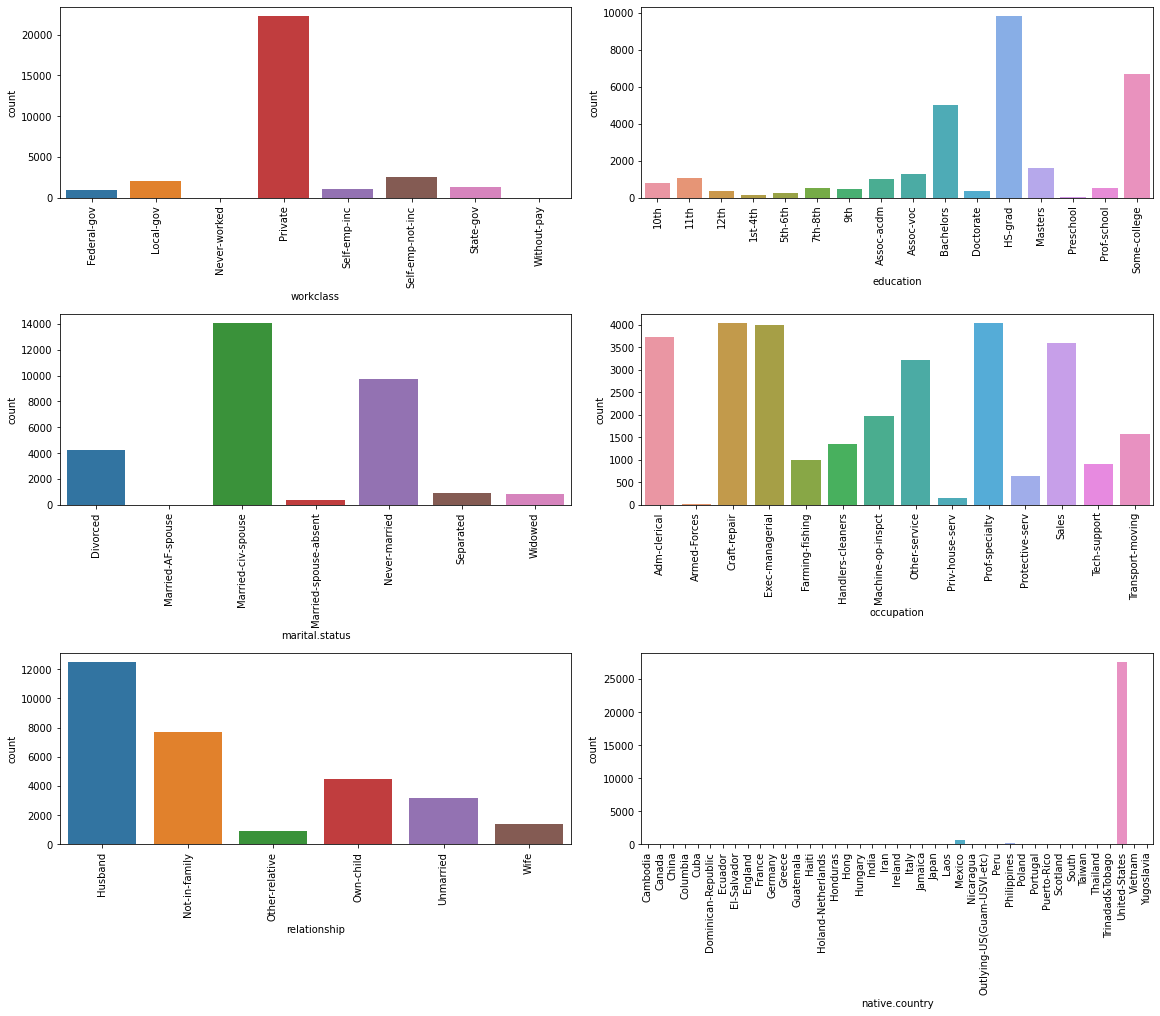

In [ ]:
#Bar plot for count in different attributes

fig, ax = plt.subplots(3, 2, figsize=(16, 14), constrained_layout=True) #size and layout of the plot

sn.countplot(x='marital.status', data=df_income, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, fontsize=10) 

sn.countplot(x='education', data=df_income, ax=ax[0,1])
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90, fontsize=10)

sn.countplot(x='workclass', data=df_income, ax=ax[0,0])
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=90, fontsize=10)

sn.countplot(x='occupation', data=df_income, ax=ax[1,1])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90, fontsize=10)

sn.countplot(x='relationship', data=df_income, ax=ax[2,0])
ax[2,0].set_xticklabels(ax[2,0].get_xticklabels(), rotation=90, fontsize=10)

sn.countplot(x='native.country', data=df_income, ax=ax[2,1])
ax[2,1].set_xticklabels(ax[2,1].get_xticklabels(), rotation=90, fontsize=10)

sn.countplot(x='marital.status', data=df_income, ax=ax[1,0])
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=90, fontsize=10)
plt.show()

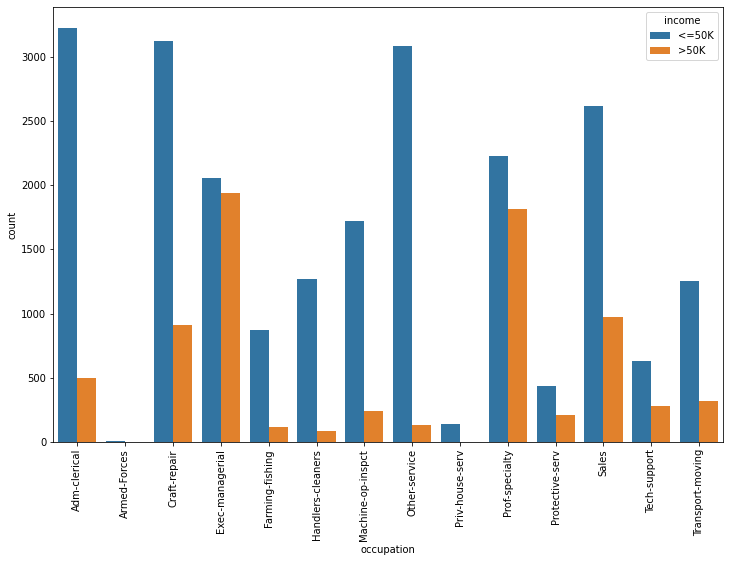

In [ ]:
# Impact of education on income
plt.figure(figsize=(12,8)) #size of the fig
ax = sn.countplot(x='occupation', hue='income', data=df_income)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10) #labels the graph and roates the names for better visibility
plt.show()

<Figure size 864x576 with 0 Axes>

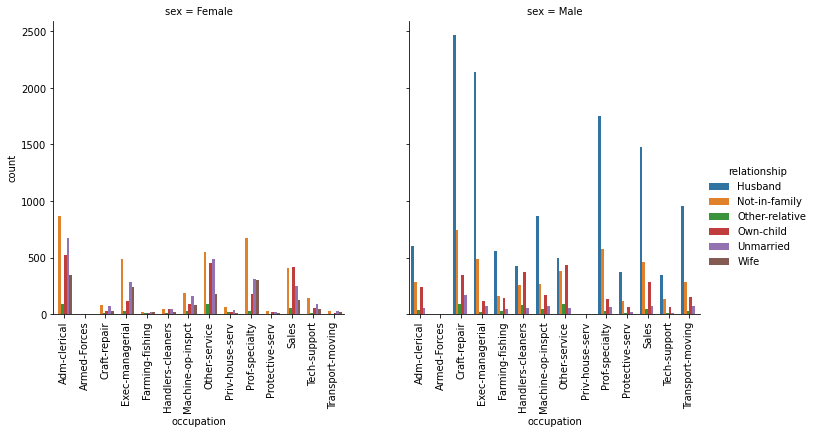

In [ ]:
# Multivariate  plot to check Impact of occupation and relationships on income using countplots
plt.figure(figsize=(12,8)) #size of the plot
work = sn.catplot(x='occupation', hue='relationship', col='sex', data=df_income, kind='count')
work.set_xticklabels(rotation=90, fontsize=10) #labels the graph and roates the names for better representation
plt.show()

<Figure size 864x576 with 0 Axes>

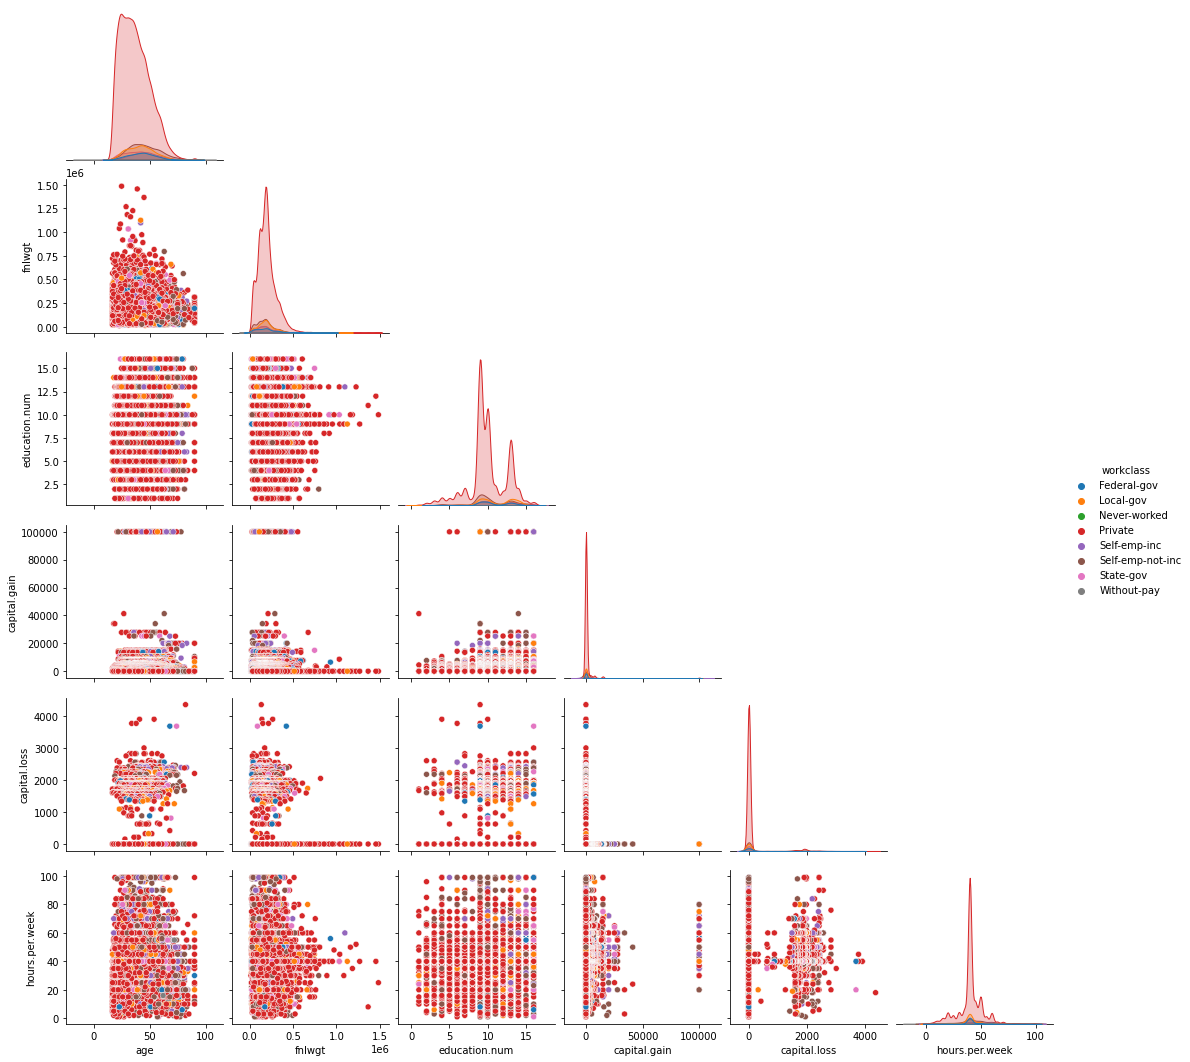

In [ ]:
#bi-variate graph for workclass in the dataset
fig=plt.figure(figsize=(12,8)) #size of the figure
sn.pairplot(df_income, hue="workclass", corner=True)
plt.show()

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076511       0.043526      0.080154      0.060165   
fnlwgt         -0.076511  1.000000      -0.044992      0.000422     -0.009750   
education.num   0.043526 -0.044992       1.000000      0.124416      0.079646   
capital.gain    0.080154  0.000422       0.124416      1.000000     -0.032229   
capital.loss    0.060165 -0.009750       0.079646     -0.032229      1.000000   
hours.per.week  0.101599 -0.022886       0.152522      0.080432      0.052417   

                hours.per.week  
age                   0.101599  
fnlwgt               -0.022886  
education.num         0.152522  
capital.gain          0.080432  
capital.loss          0.052417  
hours.per.week        1.000000  


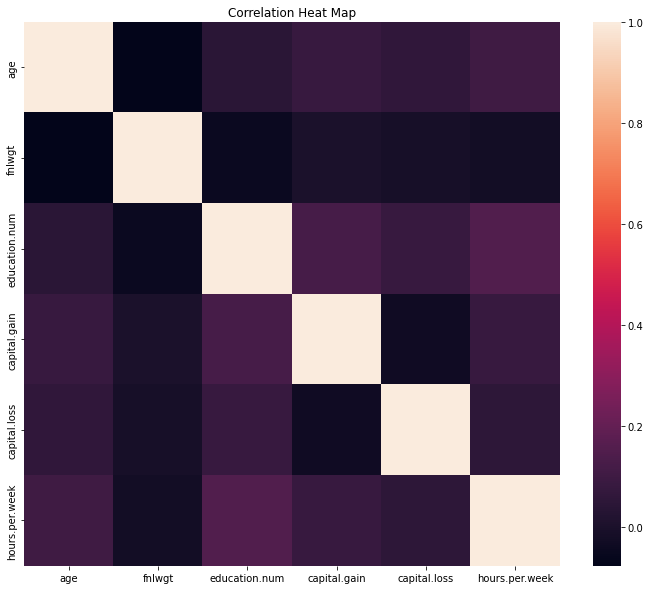

In [ ]:
#correlation matrix
matrix = df_income.corr() #finds correlation 
print(matrix)
plt.figure(figsize=(12,10)) #fig size
sn.heatmap(df_income.corr()) #plots the heat map
plt.title('Correlation Heat Map') #titles the plot
plt.show()

###ONE HOT ENCODING

In [ ]:
# checking if we need both education and education_num columns
for edu in df_income['education'].unique():
    print(edu,":", df_income[df_income['education'] == edu]["education.num"].nunique())   


HS-grad : 1
7th-8th : 1
Some-college : 1
10th : 1
Doctorate : 1
Prof-school : 1
Bachelors : 1
Masters : 1
11th : 1
Assoc-voc : 1
1st-4th : 1
5th-6th : 1
Assoc-acdm : 1
12th : 1
9th : 1
Preschool : 1


In [ ]:
# we observe that 'education.num' is unique for each value of 'education' Thus, we remove 'education' column for better compilation
df_income = df_income.drop(columns = ['education'])

In [ ]:
# One-hot encoding the categorical variables to use in NN model
df_income = pd.get_dummies(df_income, drop_first=True)
df_income.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
#Checking the info for the dataset after processing
df_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 83 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education.num                              30162 non-null  int64
 3   capital.gain                               30162 non-null  int64
 4   capital.loss                               30162 non-null  int64
 5   hours.per.week                             30162 non-null  int64
 6   workclass_Local-gov                        30162 non-null  uint8
 7   workclass_Never-worked                     30162 non-null  uint8
 8   workclass_Private                          30162 non-null  uint8
 9   workclass_Self-emp-inc                     30162 non-null  uint8
 10  workclass_Self-emp-not-inc                 301

In [ ]:
# min-max scaling of the continuous features
continuous_columns = ["age", "fnlwgt", "capital.loss", "capital.gain", "education.num", "hours.per.week"]

for col in continuous_columns:
    df_income[col] = (df_income[col] - df_income[col].mean()) / (df_income[col].max() - df_income[col].min())

In [ ]:
# initializing the target variable 
X = df_income.iloc[:, :-1]
y = df_income["income_>50K"]
 

In [ ]:
from sklearn.model_selection import train_test_split
# Split Train and Test Datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5) #splittig the dataset in test and train with 80% and random state of 50

In [ ]:
#print(X_train)

In [ ]:
#printitng the shape of the dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("shape of the test train split")

(24129, 82)
(24129,)
(6033, 82)
(6033,)
shape of the test train split


###PART 1: NEURAL NETWORK MODEL

###initializing the neural network

In [ ]:
#Input features to the first hidden layer of 256 neurons, followed by two additional hidden layers of 512 and 512 neurons each.
#There’s a 1-neuron output layer at the end. Hidden layers use leaky ReLU as the activation function, and the output layer uses Sigmoid as activation fucntion
#we use dropout after each hidden layer
#nd a kernel regularization of l2 
import tensorflow as tf #importing tensor flow
tf.random.set_seed(42)

nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation=partial(tf.nn.leaky_relu, alpha=0.05),input_shape = (82,)), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=partial(tf.nn.leaky_relu, alpha=0.05),kernel_regularizer="l2"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation=partial(tf.nn.leaky_relu, alpha=0.05), kernel_regularizer="l2"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# nn_model.compile(
#     loss=tf.keras.losses.mse, #loss fucntion
#     optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0025), #adamax optimiser with 0.005 learing rate
#     metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')
#     ]
# )

nn_model.compile(optimizer='adam',
                loss = tf.keras.losses.binary_crossentropy,
                metrics=['accuracy'])

In [ ]:
#neural network model summary
nn_model.summary() #prints the model summary

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               21248     
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [ ]:
#training the neural network on train data with 200 epochs and batch size =512
nn_history = nn_model.fit(X_train, y_train,
          batch_size=512, epochs=200,
          validation_data=(X_test, y_test))

Epoch 1/200
48/48 [==============================] - 1s 8ms/step - loss: 4.4118 - accuracy: 0.7678 - val_loss: 1.4480 - val_accuracy: 0.8202
Epoch 2/200
48/48 [==============================] - 1s 12ms/step - loss: 0.7940 - accuracy: 0.8227 - val_loss: 0.4664 - val_accuracy: 0.8271
Epoch 3/200
48/48 [==============================] - 0s 7ms/step - loss: 0.4220 - accuracy: 0.8270 - val_loss: 0.4005 - val_accuracy: 0.8296
Epoch 4/200
48/48 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.8310 - val_loss: 0.3876 - val_accuracy: 0.8324
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8337 - val_loss: 0.3852 - val_accuracy: 0.8349
Epoch 6/200
48/48 [==============================] - 0s 4ms/step - loss: 0.3765 - accuracy: 0.8335 - val_loss: 0.3750 - val_accuracy: 0.8381
Epoch 7/200
48/48 [==============================] - 0s 4ms/step - loss: 0.3728 - accuracy: 0.8375 - val_loss: 0.3727 - val_accuracy: 0.8397
Epoch 8/200


In [ ]:
#testing evaluation
nn_model.evaluate(X_test, y_test)[1]  #runs the neural network for test data  

189/189 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8563


0.8562904000282288

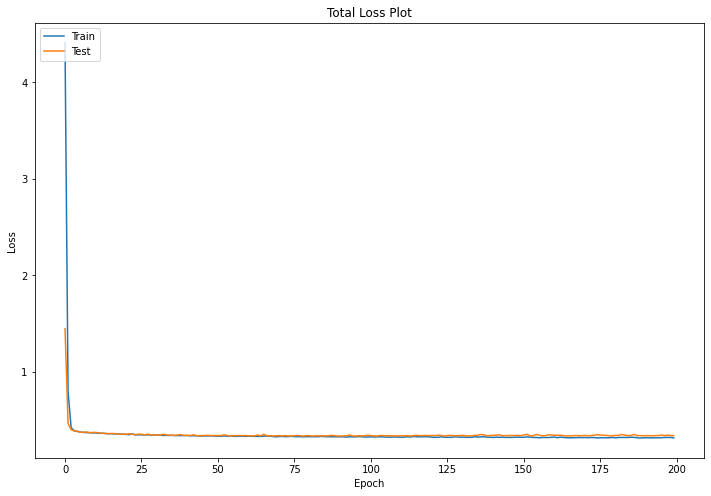

In [ ]:
#plotting loss to epoch for test and train data
fig=plt.figure(figsize=(12,8)) #size of the figure
plt.plot(nn_history.history['loss'])
plt.plot(nn_history.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

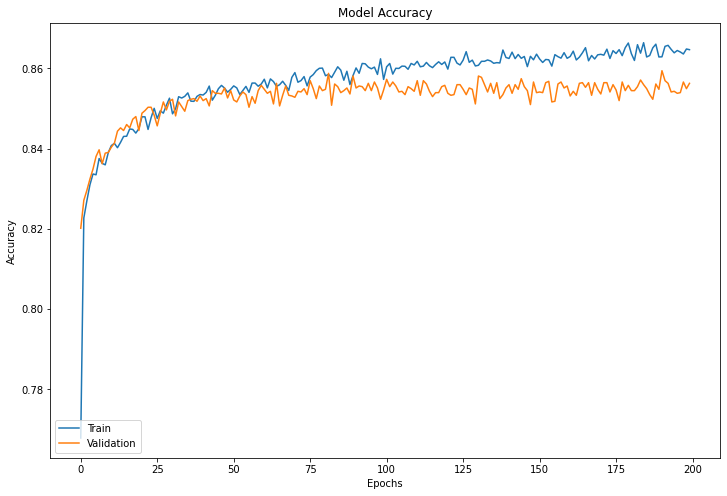

In [ ]:
#plotting model accuracy for test and train data
fig=plt.figure(figsize=(12,8)) #size of the figure
plt.plot(nn_history.history['accuracy'])
plt.plot(nn_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

###PART 2


###Building a CNN 

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the dataset
from keras.datasets import fashion_mnist

In [ ]:
#importing the required liabraries
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
import math

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.initializers import GlorotNormal

In [ ]:
#from google.colab import drive 
from tensorflow.keras.utils import to_categorical
#drive.mount('/content/gdrive')
(Xtrain, ytrain), (Xtest, ytest) = fashion_mnist.load_data()

In [ ]:
#printing the shape of training and 
print(Xtrain.shape) #prints shape of the xtrain
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


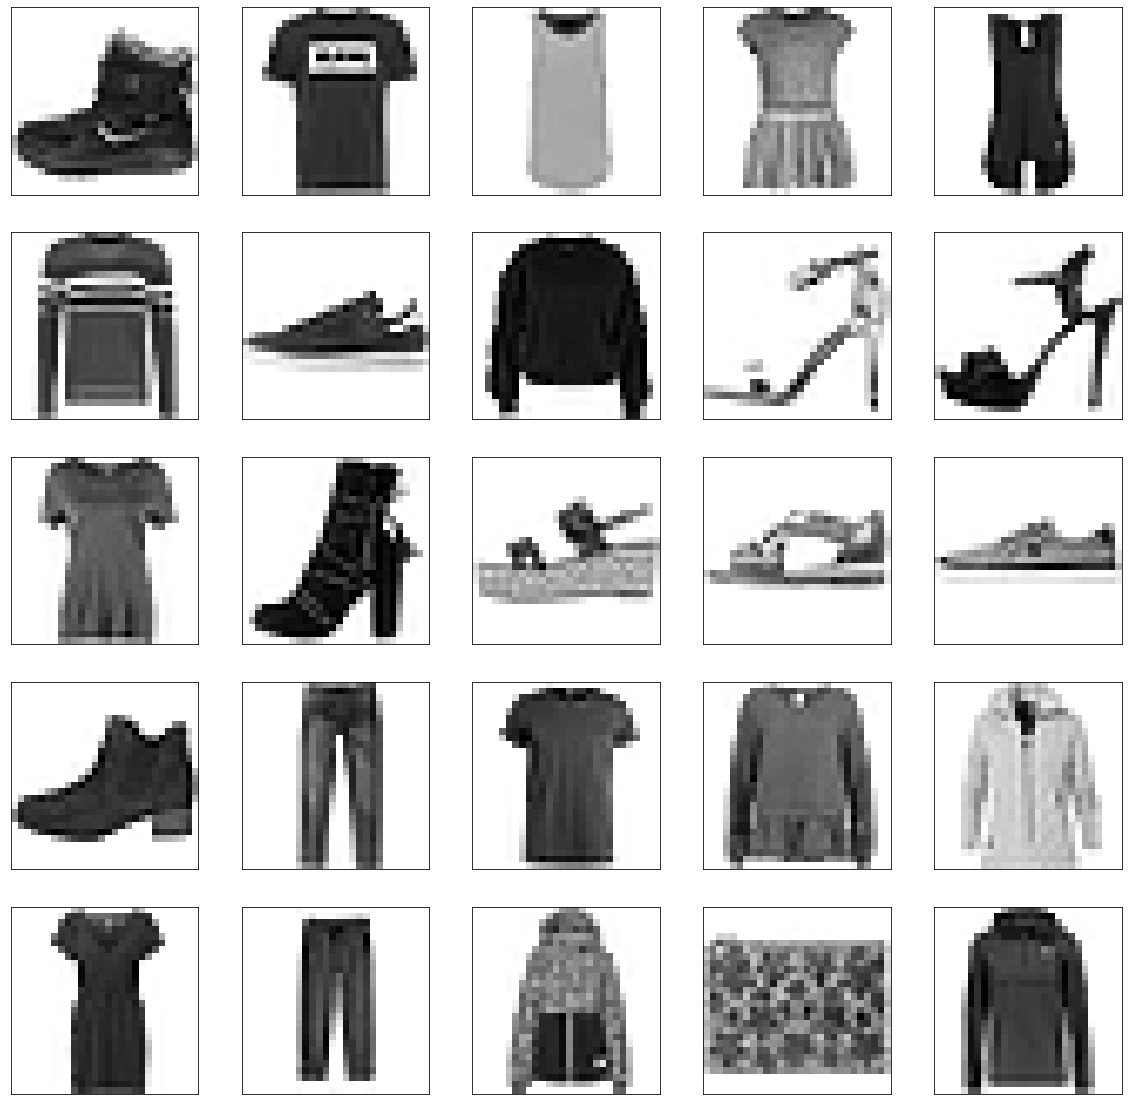

In [ ]:
#visualised the  dataset
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(Xtrain[i], cmap=plt.cm.binary)
plt.show()

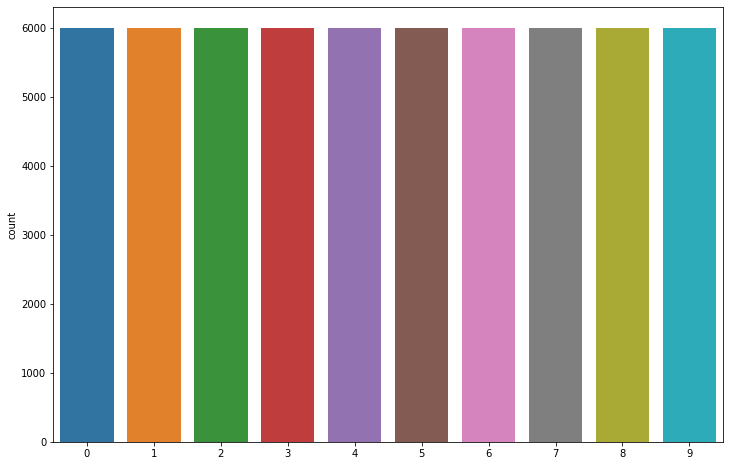

In [237]:
#plotting the count plot for ytrain
plt.figure(figsize=(12,8))
sns.countplot(x = ytrain)
plt.show()

In [ ]:
#converting the datatypes
trainX = Xtrain/np.float32(255)
trainy = ytrain.astype(np.int32)
testX = Xtest/np.float32(255)
testy = ytest.astype(np.int32)

testy = to_categorical(testy)
trainy = to_categorical(trainy)

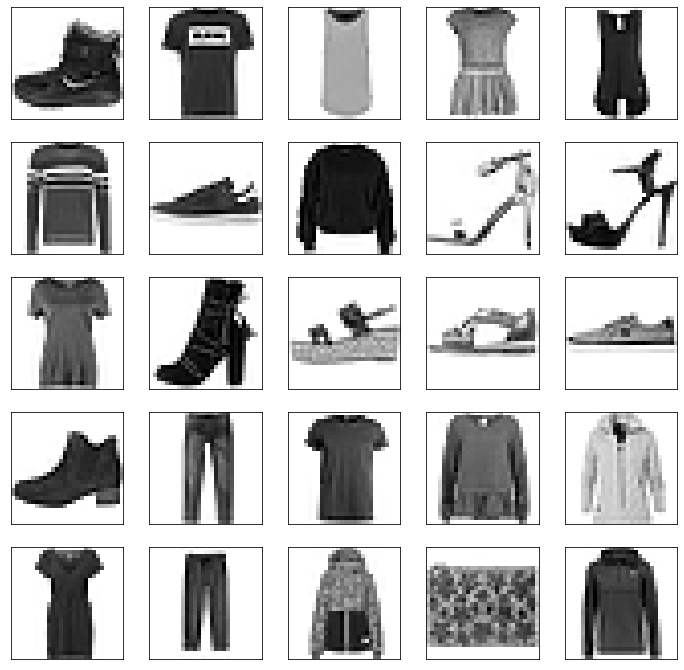

In [ ]:
#visualises the dataset
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
plt.show()

In [225]:
#designing a sequential model which is linear sequential of layers. The Sequential model is initialized first and then using add method to add rest of the layers in sequence

model = tf.keras.Sequential()
#for the First layer, having a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation  of pool size 2x2
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#in the Second layer, having a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation  of pool size2x2
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#connected flattened layer
model.add(Flatten())
model.add(Dense(256, activation=tf.nn.relu))#256 neurons with activation fuction as relu
#Output layer having 10 neurons  with softmax activation fucntion
model.add(Dense(10, activation=tf.nn.softmax))  


In [226]:
#printitng the  cnn model summary
print(model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dense_38 (Dense)            (None, 256)             

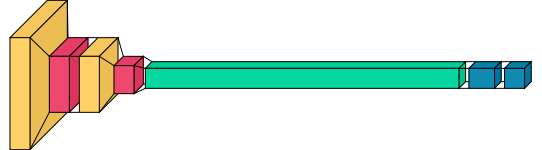

In [227]:
#importing visual keras  and visualizing the cnn built acitecture
import visualkeras
visualkeras.layered_view(model)


In [228]:
# Optimizer specified here is adam, loss is categorical crossentrophy and metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [229]:

Img_shape = 28 #image shape
Num_classes = 10 #number of classes
test_size = 0.2 #test split size
random_state = 5 # random state 
No_epochs = 50 #number of epochs
Batch_size = 1024 #batch size

In [230]:
#training the cnn on train dataset with 50 epoches and validation data
train_model = model.fit(trainX, trainy,
                  batch_size=Batch_size,
                  epochs=No_epochs,
                  verbose=1,
                  validation_data=(testX, testy))

Epoch 1/50
59/59 [==============================] - 2s 19ms/step - loss: 0.7659 - accuracy: 0.7442 - val_loss: 0.4876 - val_accuracy: 0.8253
Epoch 2/50
59/59 [==============================] - 1s 14ms/step - loss: 0.4227 - accuracy: 0.8504 - val_loss: 0.4056 - val_accuracy: 0.8542
Epoch 3/50
59/59 [==============================] - 1s 16ms/step - loss: 0.3628 - accuracy: 0.8716 - val_loss: 0.3736 - val_accuracy: 0.8625
Epoch 4/50
59/59 [==============================] - 1s 15ms/step - loss: 0.3319 - accuracy: 0.8826 - val_loss: 0.3461 - val_accuracy: 0.8762
Epoch 5/50
59/59 [==============================] - 1s 14ms/step - loss: 0.3100 - accuracy: 0.8899 - val_loss: 0.3384 - val_accuracy: 0.8789
Epoch 6/50
59/59 [==============================] - 1s 14ms/step - loss: 0.2968 - accuracy: 0.8944 - val_loss: 0.3356 - val_accuracy: 0.8729
Epoch 7/50
59/59 [==============================] - 1s 14ms/step - loss: 0.2784 - accuracy: 0.8994 - val_loss: 0.3194 - val_accuracy: 0.8848
Epoch 8/50
59

In [231]:
#evaluates the cnn on test dataset
cnn_score = model.evaluate(testX, testy, steps=math.ceil(10000/32))
print('Test loss:', cnn_score[0])
print('Test accuracy:', cnn_score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3110 - accuracy: 0.9202
Test loss: 0.31099051237106323
Test accuracy: 0.920199990272522


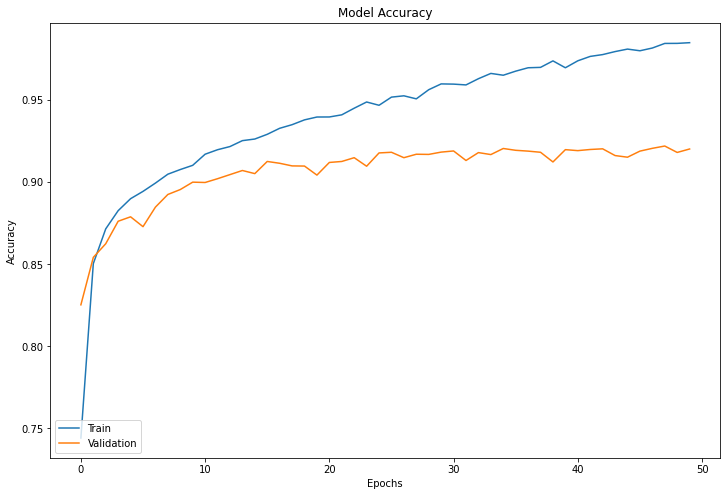

In [234]:
#plotting model accuracy for test and train data
fig=plt.figure(figsize=(12,8)) #size of the figure
# plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='lower left')
plt.show()

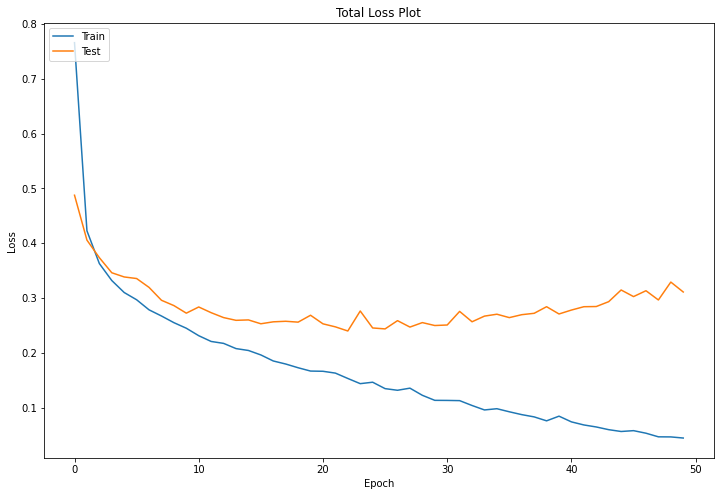

In [235]:
#plotting loss to epoch for test and train data
fig=plt.figure(figsize=(12,8)) #size of the figure
# plt.figure(figsize=(20,20))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss']) 
plt.title('Total Loss Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

# References


1. Numpy - https://numpy.org/doc/stable/user/absolute_beginners.html
       to get the basic idea of numpy and it's usage
2. Pandas - https://pandas.pydata.org/docs/reference/frame.html
       to get basic functions of pandas
3. Stack Overflow - https://stackoverflow.com
       to fix errors while solving the above assignment
4. Real Python for pandas - https://realpython.com/pandas-python-explore-dataset/
       Exploring different functions of reading and working with a dataset.
5. Matplotlib for plotting heat maps: https://machinelearningknowledge.ai/matplotlib-heatmap-complete-tutorial-for-beginners/
       Referred for link to plot the heatmaps and syntax for plotting
6. Matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/ and https://matplotlib.org/stable/tutorials/index
       Learn the basics of matplotlib for plotting graphs.
7. Seaborn Tutorial - https://www.geeksforgeeks.org/python-seaborn-tutorial/
       Learn the basics of plotting graphs using seaborn
8. Plotly Tutorial - https://plotly.com/python/
       Learnt the basics of plotting graphs using plotly

9.https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

10.https://numpy.org/doc/stable/reference/generated/numpy.identity.html


11) https://numpy.org/doc/stable/reference/generated/numpy.identity.html

12) https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

13) https://stackoverflow.com/questions/38125319/python-divide-by-zero-encountered-in-log
-logistic-regression

14) https://numpy.org/doc/stable/reference/generated/numpy.dot.html

16) https://datatofish.com/line-chart-python-matplotlib/

17) https://pandas.pydata.org/docs/reference/frame.html

18) https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introduct
ory-usage-py

19)https://keras.io/api/

20) https://keras.io/api/models/sequential/

21) https://numpy.org/

22) https://keras.io/api/models/model_training_apis/#fit-method

23) https://keras.io/api/callbacks/model_checkpoint/

24) https://keras.io/api/optimizers/

25) https://keras.io/api/layers/activations/


26) https://keras.io/api/

27) https://keras.io/api/models/sequential/

28) https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html